In [1]:
from utils import *

In [2]:
import seaborn as sns
sns.set_style("darkgrid")


In [3]:
#### 
# q=0 713
# q=0.025 660
# q=0.25 622
# q=0.5 797
# q=0.75 14
# q=0.975 535
# q=1 346

In [4]:
q = [713, 622, 797, 14, 346]
qq = [0, 0.25 , 0.5, 0.75, 1.0]

In [5]:
files = ['run_doctor_3d/', 'run_bayesian_3d/', 'run_num_opt_3d/', 'run_rls_3d/']
# files = ['run_doctor_2d/', 'run_bayesian_2d/', 'run_num_opt_2d/', 'run_rls_2d/']

files = ['simulations/' + x for x in files]

In [6]:
destination = 'figures_3d/'

In [7]:
dat = load_data(files[1])
dat.files

['nTAR', 'nTIR', 'nTBR', 'nMeal', 'nCGM', 'nBG0', 'X_sample', 'Y_sample']

In [8]:
# Settings for plot to make it friendly to colorblind people

CB_color_cycle = ['#377eb8', '#ff7f00', '#4daf4a',
                  '#f781bf', '#a65628', '#984ea3',
                  '#999999', '#e41a1c', '#dede00']

import itertools
marker = itertools.cycle(('1', '2', '3', '4'))
CB_color_cycle = itertools.cycle(('#377eb8', '#ff7f00', '#4daf4a','#f781bf'))

plot_titles = itertools.cycle(('p1', 'p2', 'p3', 'p4', 'p5', 'p6'))


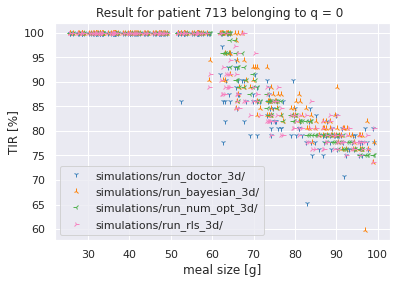

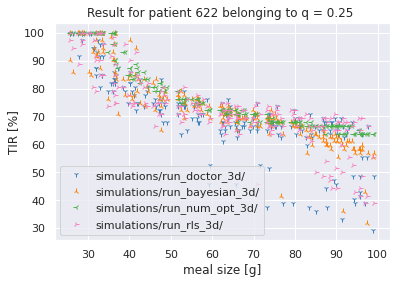

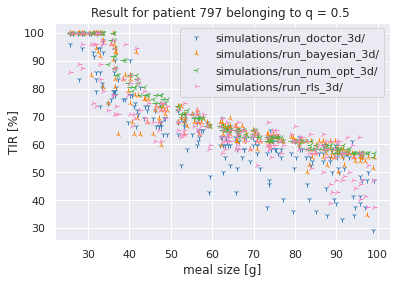

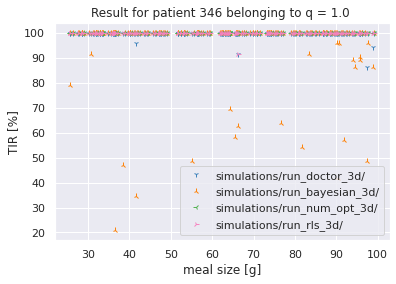

In [9]:

plot_title = next(plot_titles)


for patient, quantile in zip(q,qq):
    plt.figure()

    for file in files:
        dat = load_data(file)
        nMeal = dat['nMeal'].squeeze()[:,patient]
        nTIR = dat['nTIR'].squeeze()[:,patient]
        plt.plot(nMeal * 5,nTIR, marker = next(marker), linestyle = '', color = next(CB_color_cycle), label = file, alpha = 0.95)

    plt.title(f'Result for patient {patient} belonging to q = {quantile} ')
    plt.legend()
    plt.xlabel('meal size [g]')
    plt.ylabel('TIR [%]')
    plt.savefig(f'{destination}{plot_title}_{patient}.pdf', dpi = 150)
    plt.show()

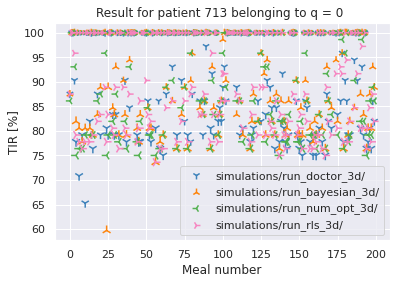

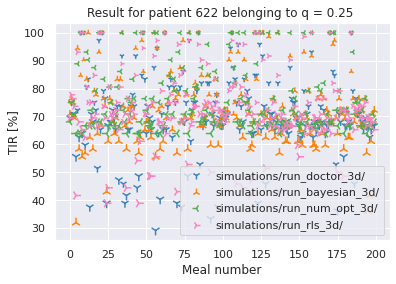

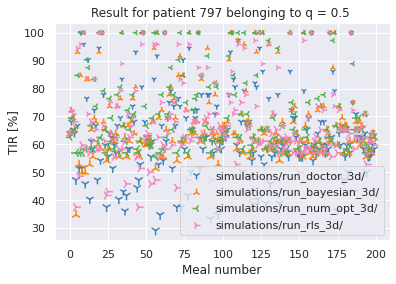

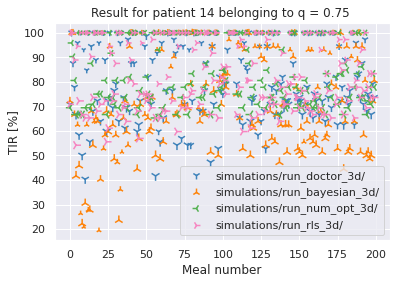

In [10]:
plot_title = next(plot_titles)
for patient, quantile in zip(q,qq):
    plt.figure()

    for file in files:
        dat = load_data(file)
        nMeal = dat['nMeal'].squeeze()[:,patient]
        nTIR = dat['nTIR'].squeeze()[:,patient]
        plt.scatter(range(nMeal.shape[0]),nTIR, marker = next(marker), color = next(CB_color_cycle), label = file, alpha = 0.95, s=nMeal*5)

    plt.title(f'Result for patient {patient} belonging to q = {quantile} ')
    plt.legend()
    plt.xlabel('Meal number')
    plt.ylabel('TIR [%]')
    plt.savefig(f'{destination}{plot_title}_{patient}.pdf', dpi = 150)
    plt.show()



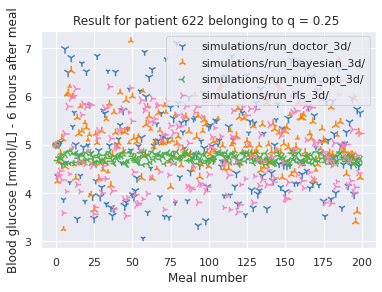

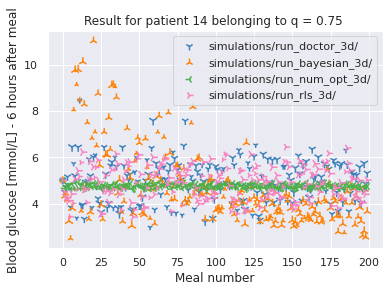

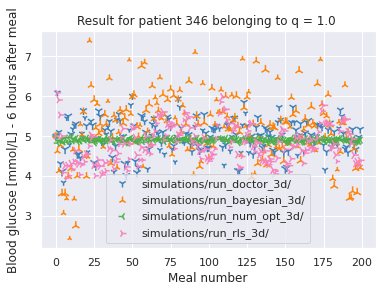

In [11]:
plot_title = next(plot_titles)

for patient, quantile in zip(q,qq):
    plt.figure()

    for file in files:
        dat = load_data(file)
        nMeal = dat['nMeal'].squeeze()[:,patient]
        BG0 = dat['nBG0'].squeeze()[:,patient]

        if len(BG0) > len(nMeal):
            BG0 = BG0[::2]
        plt.scatter(range(nMeal.shape[0]),BG0, marker = next(marker), color = next(CB_color_cycle), label = file, alpha = 0.95, s=nMeal*5)

    plt.title(f'Result for patient {patient} belonging to q = {quantile} ')
    plt.legend()
    plt.xlabel('Meal number')
    plt.ylabel('Blood glucose [mmol/L] - 6 hours after meal')
    plt.savefig(f'{destination}{plot_title}_{patient}.pdf', dpi = 150)
    plt.show()

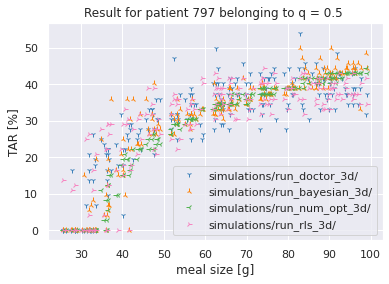

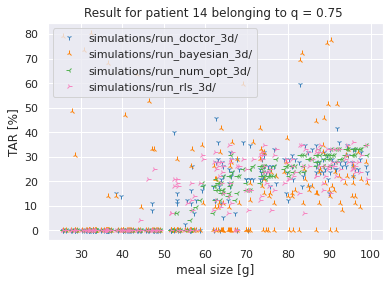

In [12]:
plot_title = next(plot_titles)

for patient, quantile in zip(q,qq):
    plt.figure()

    for file in files:
        dat = load_data(file)
        nMeal = dat['nMeal'].squeeze()[:,patient]
        nTIR = dat['nTAR'].squeeze()[:,patient]
        plt.plot(nMeal * 5,nTIR, marker = next(marker), linestyle = '', color = next(CB_color_cycle), label = file, alpha = 0.95)

    plt.title(f'Result for patient {patient} belonging to q = {quantile} ')
    plt.legend()
    plt.xlabel('meal size [g]')
    plt.ylabel('TAR [%]')
    plt.savefig(f'{destination}{plot_title}_{patient}.pdf', dpi = 150)
    plt.show()

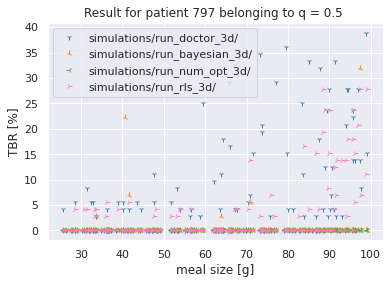

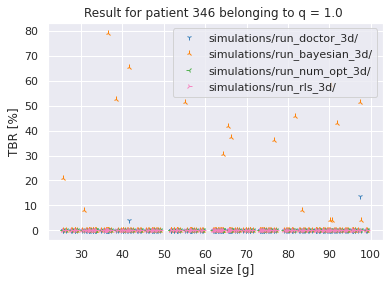

In [13]:
plot_title = next(plot_titles)

for patient, quantile in zip(q,qq):
    plt.figure()

    for file in files:
        dat = load_data(file)
        nMeal = dat['nMeal'].squeeze()[:,patient]
        nTIR = dat['nTBR'].squeeze()[:,patient]
        plt.plot(nMeal * 5,nTIR, marker = next(marker), linestyle = '', color = next(CB_color_cycle), label = file, alpha = 0.95)

    plt.title(f'Result for patient {patient} belonging to q = {quantile} ')
    plt.legend()
    plt.xlabel('meal size [g]')
    plt.ylabel('TBR [%]')
    plt.savefig(f'figures/{plot_title}_{patient}.pdf', dpi = 150)
    plt.show()

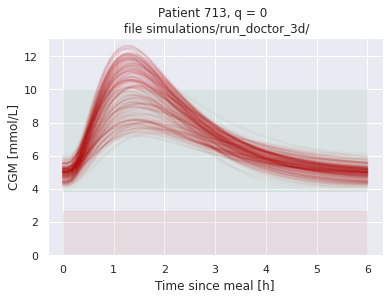

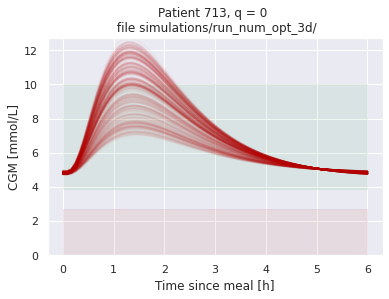

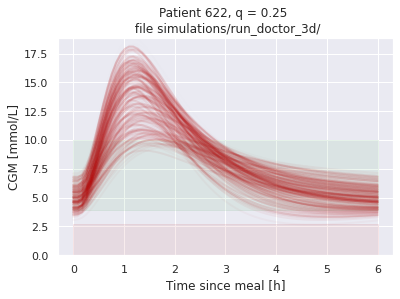

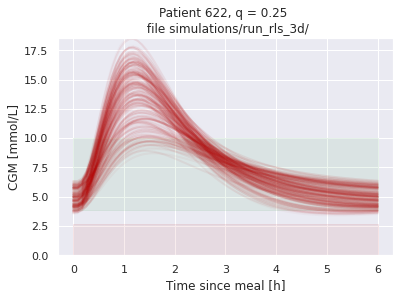

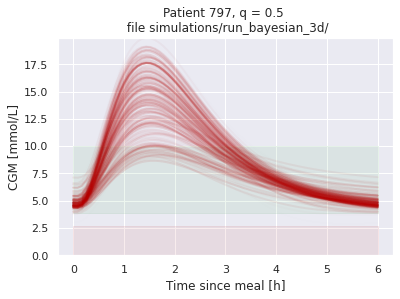

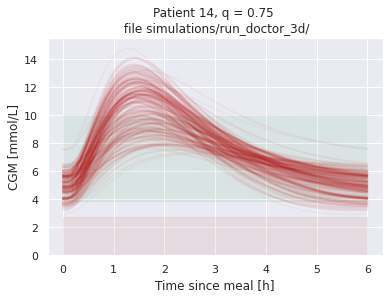

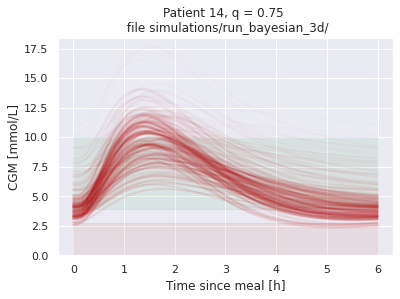

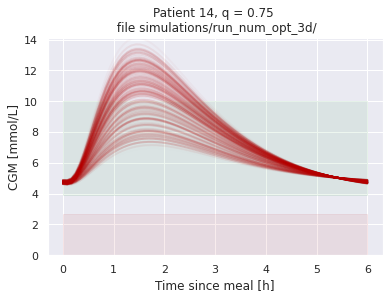

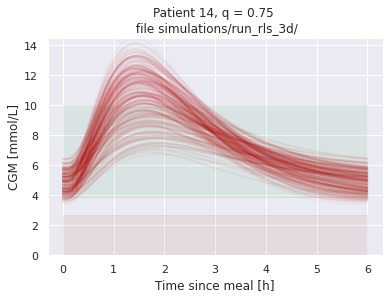

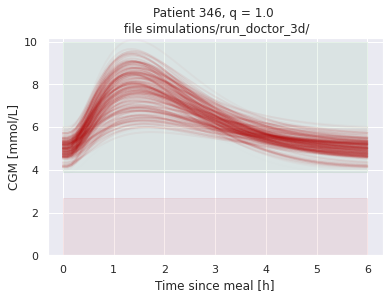

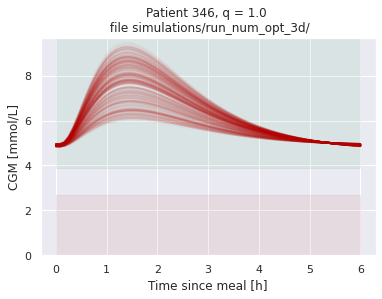

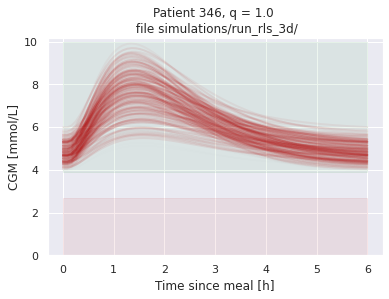

In [14]:
### Patient 


plot_title = next(plot_titles)
names = ['run_doctor_2d', 'run_bayesian_2d', 'run_num_opt_2d', 'run_rls_2d']

for patient, quantile in zip(q,qq):
    plt.figure()
    for j, file in enumerate(files):
        dat = load_data(file)
        nCGM = dat['nCGM'][:,:,patient]
        time = np.linspace(0,72,72)*5/60
        plt.fill_between(time,3.9+0*time,10+0*time,color='g',alpha=0.1)
        plt.fill_between(time,0+0*time,2.7+0*time,color='r',alpha=0.1)
        for i in range(200):
            plt.plot(time,nCGM[i,:],color=(0.7,0.0,0.0),linewidth=2,label='CGM', alpha = 0.1 * i/200)

        plt.xlabel('Time since meal [h]')
        plt.ylabel('CGM [mmol/L]')
        plt.ylim(0,nCGM.max())
        plt.title(f'Patient {patient}, q = {quantile} \n file {file}')
        plt.savefig(f'{destination}patient{patient}{names[j]}.pdf', dpi=150, bbox_inches = 'tight')
        plt.show()